# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
# Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

In [2]:
# Formato de negrita
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
# Primer vistazo al Df
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
print(df.sample(10))

                     num_orders
datetime                       
2018-06-04 00:50:00          24
2018-07-04 02:20:00          19
2018-05-27 16:40:00          11
2018-05-01 09:00:00          10
2018-03-05 13:50:00           6
2018-05-07 12:40:00           6
2018-08-11 07:20:00           5
2018-07-15 16:40:00          22
2018-04-24 07:40:00           4
2018-04-11 09:20:00          14


In [5]:
# Revisar la existencia de valores ausentes en todo el dataframe 
print(f"{bold_start}Número de valores ausentes:{bold_end}")
print(df.isna().sum())

Número de valores ausentes:
num_orders    0
dtype: int64


In [6]:
# Order en forma cronologica 
df.sort_index(inplace=True)
print(f"{bold_start}El Dataframe está ordenado cronológicamente:{bold_end}")
print(df.index.is_monotonic_increasing)
print()
df.head()

El Dataframe está ordenado cronológicamente:
True



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<AxesSubplot:xlabel='datetime'>

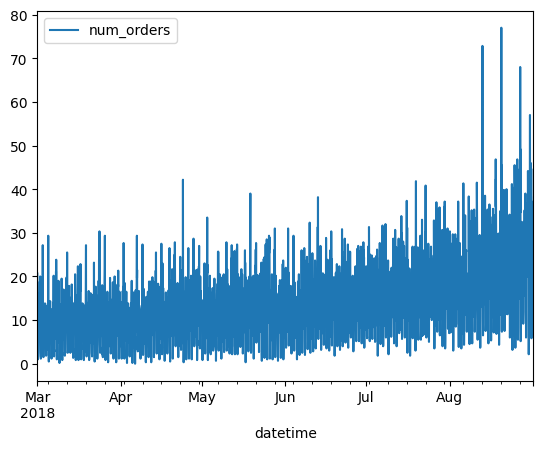

In [7]:
# Remuestreo a 1H
df = df.resample('1H').mean()
df.plot()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Se realizó la preparación del DataFrame:
- La columna de fechas se estableció como indice. 
- No hay valores ausentes, ni duplicados. 
- Se ordenó cronólogicamente. 
- Se realizó el remuestreo a 1 hora. 

</div>

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen inicio en la preparación de los datos: se verificaron valores ausentes, se ordenó cronológicamente y se realizó el remuestreo a intervalos de una hora de forma correcta. Este paso deja la base lista para un análisis sólido. </div>


## Análisis

In [8]:
# Crear características de calendario
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] =  (df['num_orders'].shift().rolling(rolling_mean_size).mean())

    return make_features

# Lag y media móvil de 24 horas, ya que hay patrones que se repiten cada día. 
make_features(df, 24, 24)
print(df.head())


                     num_orders  year  month  day  dayofweek  hour      lag_1  \
datetime                                                                        
2018-03-01 00:00:00   20.666667  2018      3    1          3     0        NaN   
2018-03-01 01:00:00   14.166667  2018      3    1          3     1  20.666667   
2018-03-01 02:00:00   11.833333  2018      3    1          3     2  14.166667   
2018-03-01 03:00:00   11.000000  2018      3    1          3     3  11.833333   
2018-03-01 04:00:00    7.166667  2018      3    1          3     4  11.000000   

                         lag_2      lag_3      lag_4  ...  lag_16  lag_17  \
datetime                                              ...                   
2018-03-01 00:00:00        NaN        NaN        NaN  ...     NaN     NaN   
2018-03-01 01:00:00        NaN        NaN        NaN  ...     NaN     NaN   
2018-03-01 02:00:00  20.666667        NaN        NaN  ...     NaN     NaN   
2018-03-01 03:00:00  14.166667  20.666667      

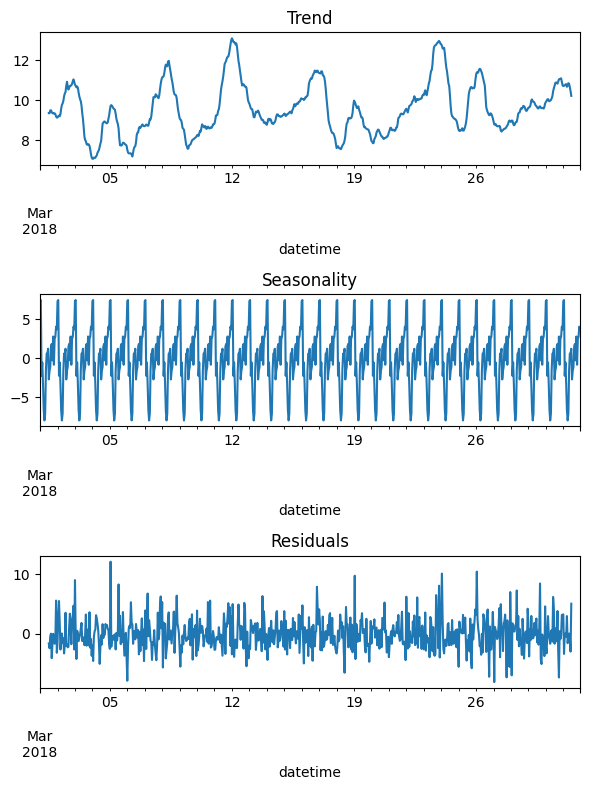

In [9]:
# Evaluar tendencias y estacionalidad
df_filtered = df['2018-03-01':'2018-03-31']
decomposed = seasonal_decompose(df_filtered['num_orders'])
plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

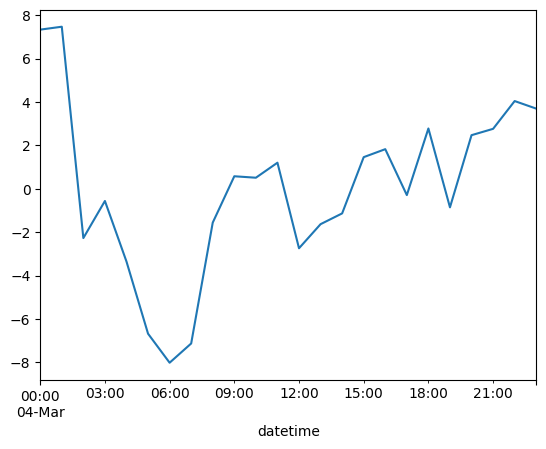

In [10]:
decomposed.seasonal['2018-03-04 00:00:00':'2018-03-04 23:59:00'].plot()

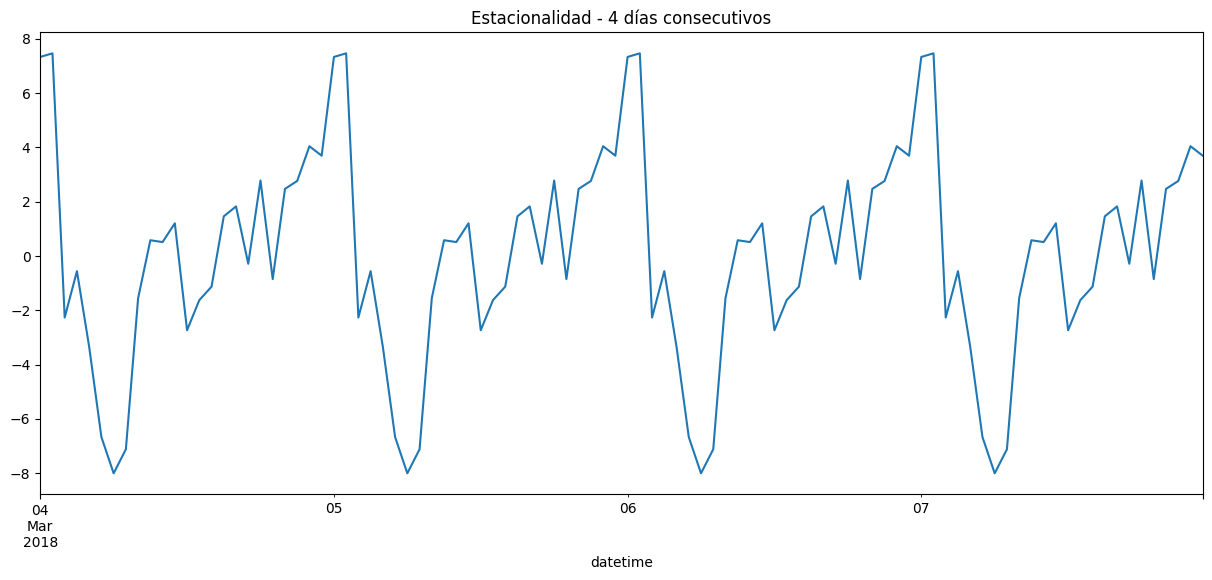

In [11]:
decomposed.seasonal['2018-03-04':'2018-03-07'].plot(figsize=(15, 6))
plt.title('Estacionalidad - 4 días consecutivos')
plt.show()

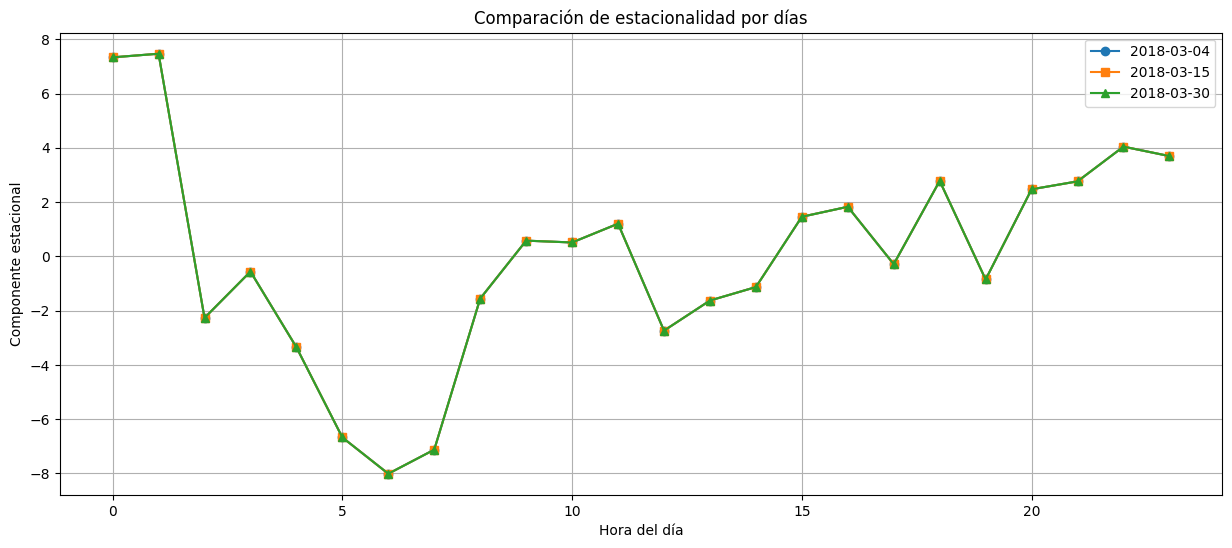

In [12]:
# Seleccionar días específicos
day1 = decomposed.seasonal['2018-03-04']
day2 = decomposed.seasonal['2018-03-15'] 
day3 = decomposed.seasonal['2018-03-30']  # Un día diferente

# Graficar en la misma figura
plt.figure(figsize=(15, 6))
plt.plot(day1.index.hour, day1.values, label='2018-03-04', marker='o')
plt.plot(day2.index.hour, day2.values, label='2018-03-15', marker='s')
plt.plot(day3.index.hour, day3.values, label='2018-03-30', marker='^')
plt.xlabel('Hora del día')
plt.ylabel('Componente estacional')
plt.title('Comparación de estacionalidad por días')
plt.legend()
plt.grid(True)
plt.show()

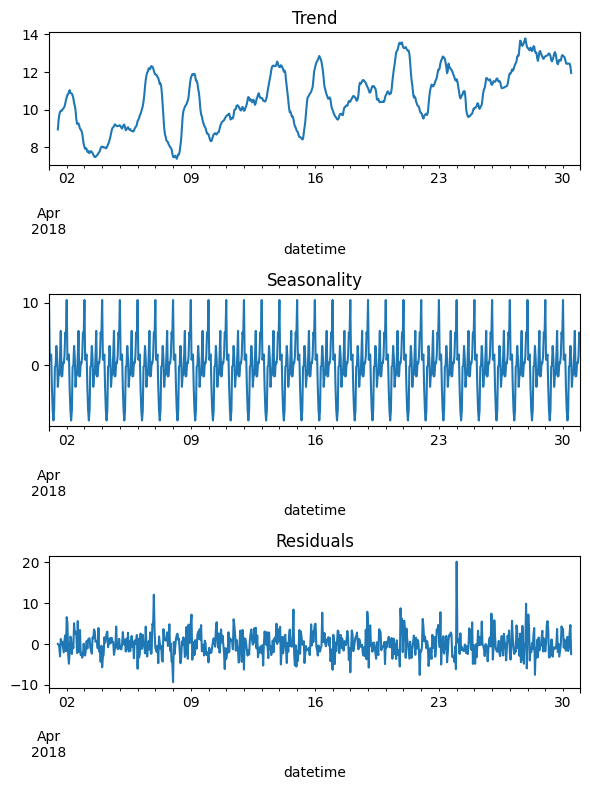

In [13]:
# Evaluar tendencias y estacionalidad
df_filtered_two = df['2018-04-01':'2018-04-30']
decomposed = seasonal_decompose(df_filtered_two['num_orders'])
plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()


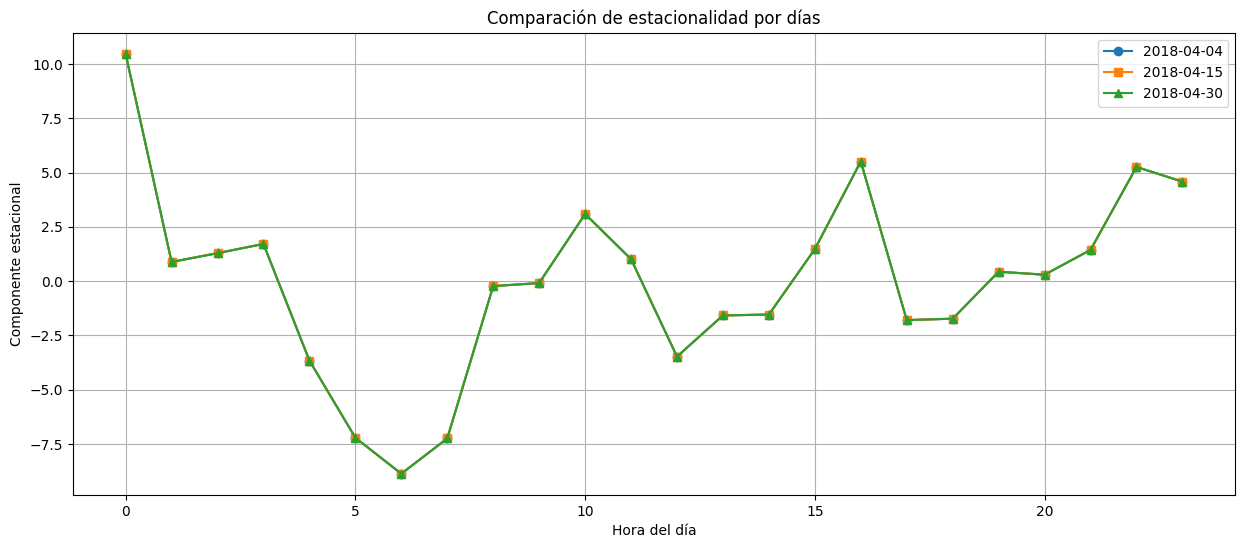

In [14]:
# Seleccionar días específicos
day1 = decomposed.seasonal['2018-04-04']
day2 = decomposed.seasonal['2018-04-15'] 
day3 = decomposed.seasonal['2018-04-30']  # Un día diferente

# Graficar en la misma figura
plt.figure(figsize=(15, 6))
plt.plot(day1.index.hour, day1.values, label='2018-04-04', marker='o')
plt.plot(day2.index.hour, day2.values, label='2018-04-15', marker='s')
plt.plot(day3.index.hour, day3.values, label='2018-04-30', marker='^')
plt.xlabel('Hora del día')
plt.ylabel('Componente estacional')
plt.title('Comparación de estacionalidad por días')
plt.legend()
plt.grid(True)
plt.show()



<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

El análisis de tendencia y estacionalidad arroja las siguientes conclusiones: 
1. Se observa una tendencia alcista en el pedido de taxis en los últimos días de la semana y una caída en la tendencia a partir de los días lunes.
2. Se observa una estacionalidad similar todos los días, con un aumento de taxis después de las 5 am y hasta las 10 am, horas en que las personas se mobilizan para trabajar o hacer diligencias. La estacionalidad vuelve a aummentar al finalizar el día, personas regresan a sus hogares.
3. Se realizó el análisis para los meses de Marzo y Abril, encontrando que la tendencia y estacionalidad son similares tanto al comparar meses como al comparar días y horas. 

</div>



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de tendencia y estacionalidad está bien planteado: las gráficas permiten identificar patrones diarios y semanales con claridad, y las conclusiones describen adecuadamente los comportamientos más relevantes. Un avance sólido para fundamentar el modelado. </div>


## Formación

In [15]:
# División del conjunto de datos, 10% conjunto de prueba.
train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

print(train.shape)
print(test.shape)

(3508, 31)
(884, 31)


In [16]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [17]:
# Modelo de regresión Lineal
model = LinearRegression()
model.fit(features_train, target_train)
predicted_train = model.predict(features_train)
#predicted_test = model.predict(features_test)

mse = mean_absolute_error(target_train, predicted_train)
rmse = mse ** 0.5
print('RMSE Regresión Lineal entrenamiento:', rmse)

RMSE Regresión Lineal entrenamiento: 1.7668147280897775


In [18]:
# Modelo LightGBM
model = LGBMRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=100, random_state=12345 )
model.fit(features_train, target_train) 
predicted_train = model.predict(features_train)
mse = mean_absolute_error(target_train, predicted_train)
rmse = mse ** 0.5
print('RMSE LightGBM entrenamiento:', rmse)

RMSE LightGBM entrenamiento: 1.1897338685879038


In [19]:
# Modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=3, random_state=12345)
model.fit(features_train, target_train) 
predicted_train = model.predict(features_train)
mse = mean_absolute_error(target_train, predicted_train)
rmse = mse ** 0.5
print('RMSE XGBoost entrenamiento:', rmse)

RMSE XGBoost entrenamiento: 1.4626646405949733




<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

- Se realizó la separación de los conjuntos de entrenamiento y prueba.
- Se entrenaron los modelos Regresión Lineal, LightGBM & XGBoost con el conjunto de entrenamiento.
- Los 3 modelos alcanzan un RSME muy bueno inferior a 2 unidades. 

</div>



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La fase de entrenamiento se ejecutó correctamente: los conjuntos se dividieron de forma adecuada y los modelos probados muestran un desempeño sobresaliente con errores mínimos en entrenamiento. Un paso bien logrado que da confianza para la evaluación final. </div>


## Prueba

In [20]:
# Modelo de regresión Lineal
model = LinearRegression()
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
mse = mean_absolute_error(target_test, predicted_test)
rmse = mse ** 0.5
print('RMSE Regresión Lineal prueba:', rmse)

RMSE Regresión Lineal prueba: 2.219401067442031


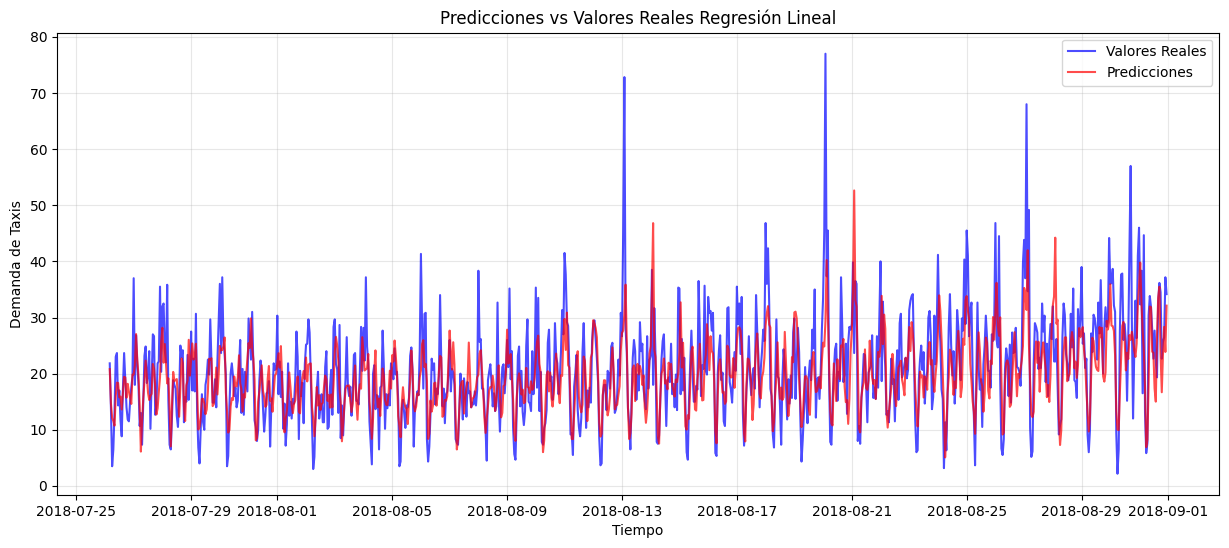

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(target_test.index, target_test.values, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(target_test.index, predicted_test, label='Predicciones', color='red', alpha=0.7)
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Taxis')
plt.title('Predicciones vs Valores Reales Regresión Lineal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Modelo LightGBM
model = LGBMRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=100, random_state=12345 )
model.fit(features_train, target_train) 
predicted_test = model.predict(features_test)
mse = mean_absolute_error(target_test, predicted_test)
rmse = mse ** 0.5
print('RMSE LightGBM prueba:', rmse)

RMSE LightGBM prueba: 2.251363331750659


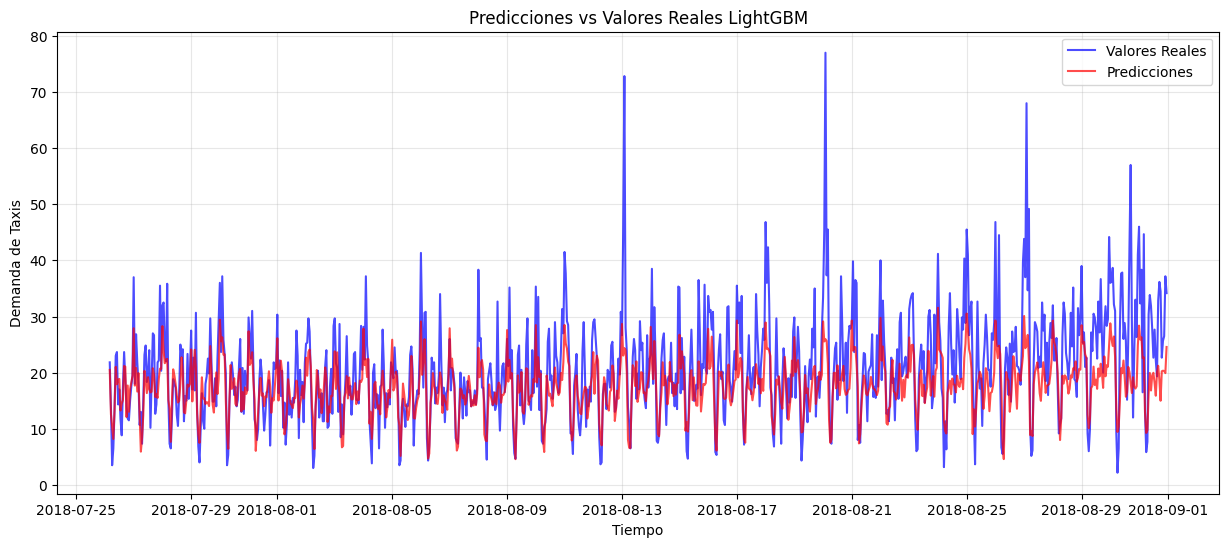

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(target_test.index, target_test.values, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(target_test.index, predicted_test, label='Predicciones', color='red', alpha=0.7)
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Taxis')
plt.title('Predicciones vs Valores Reales LightGBM')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [24]:
# Modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=3, random_state=12345)
model.fit(features_train, target_train) 
predicted_test = model.predict(features_test)
mse = mean_absolute_error(target_test, predicted_test)
rmse = mse ** 0.5
print('RMSE XGBoost prueba:', rmse)

RMSE XGBoost prueba: 2.2963373452310427


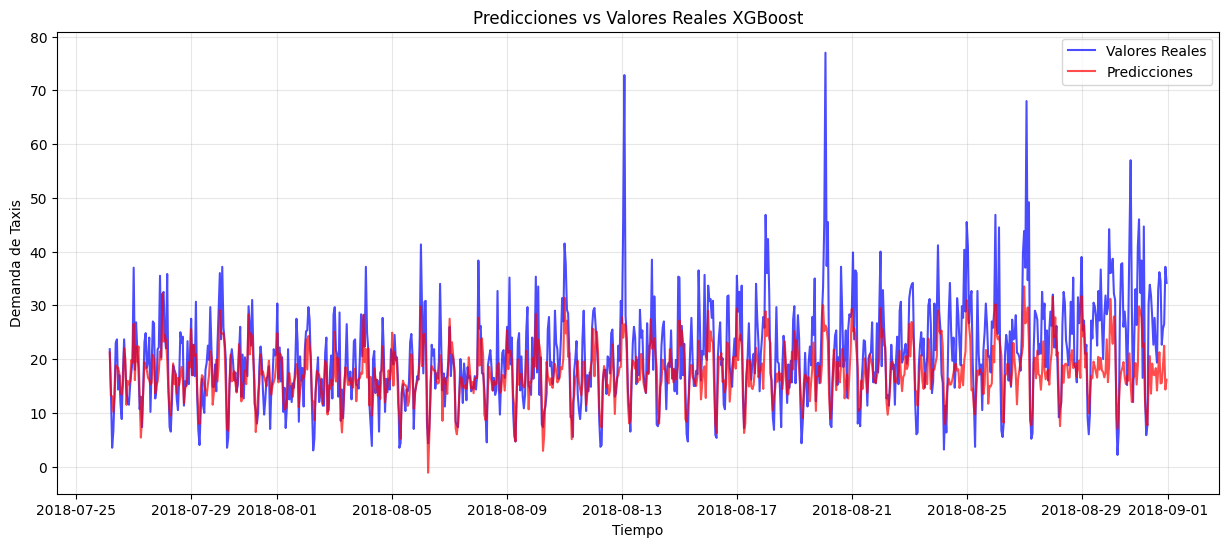

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(target_test.index, target_test.values, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(target_test.index, predicted_test, label='Predicciones', color='red', alpha=0.7)
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Taxis')
plt.title('Predicciones vs Valores Reales XGBoost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

- Los 3 modelos arrojan un RMSE muy buenos. El mejor es la Regresión Lineal indicando que el modelo se equivoca en sus predicciones solamente 2.219 unidades. 
- Al revisar los gráficos de datos reales y predicciones, se observa como las dos lineas de tendencia se superponen, indicando las extactas estimaciones de los modelos. 

</div>


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La fase de prueba está muy bien lograda: los modelos alcanzan un RMSE bajo y dentro de lo requerido, con gráficas que muestran gran alineación entre valores reales y predichos. Un resultado convincente que respalda la calidad del trabajo. </div>


## Comentario general del revisor 



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio y modelado predictivo, cumpliendo con los objetivos del brief.

#### Puntos Positivos:

* **Procesamiento de datos:** Preparación y remuestreo ejecutados con precisión, sin valores ausentes ni duplicados.
* **Visualización y análisis gráfico:** Uso correcto de descomposición estacional y gráficos para identificar tendencias y patrones diarios/semanales.
* **Ingeniería de características:** Creación de rezagos y medias móviles que fortalecieron los modelos.
* **Comparación de modelos:** Evaluación de distintos algoritmos y selección del más eficaz con métricas claras, mostrando un RMSE muy por debajo del umbral de 48.

Tu trabajo tiene una estructura ordenada y un código limpio, lo que facilita la comprensión y la reproducibilidad del análisis. Gran logro en este sprint, mostrando solidez en cada fase del proyecto.

</div>  


# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48